<a href="https://colab.research.google.com/github/Melikaeydel/GSE256265/blob/main/cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

# فایل‌ها
file1 = '/content/OT-EFO_0000305-associated-targets-5_2_2025-v25_03.tsv'    # مثلاً: سرطان سینه
file2 = '/content/OT-MONDO_0005575-associated-targets-5_2_2025-v25_03.tsv'  # مثلاً: سرطان ریه
file3 = '/content/OT-MONDO_0008903-associated-targets-5_2_2025-v25_03.tsv'  # مثلاً: سرطان روده

# خواندن فایل‌ها
df1 = pd.read_csv(file1, sep='\t')
df2 = pd.read_csv(file2, sep='\t')
df3 = pd.read_csv(file3, sep='\t')

# نمایش نام ستون‌ها از یکی از فایل‌ها
print("ستون‌های موجود در فایل اول:")
print(df1.columns)


ستون‌های موجود در فایل اول:
Index(['symbol', 'globalScore', 'gwasCredibleSets', 'geneBurden', 'eva',
       'genomicsEngland', 'gene2Phenotype', 'uniprotLiterature',
       'uniprotVariants', 'orphanet', 'clingen', 'cancerGeneCensus', 'intogen',
       'evaSomatic', 'cancerBiomarkers', 'chembl', 'crisprScreen', 'crispr',
       'slapenrich', 'progeny', 'reactome', 'sysbio', 'europepmc',
       'expressionAtlas', 'impc', 'maxClinicalTrialPhase', 'isInMembrane',
       'isSecreted', 'hasLigand', 'hasSmallMoleculeBinder', 'hasPocket',
       'mouseOrthologMaxIdentityPercentage', 'hasHighQualityChemicalProbes',
       'geneticConstraint', 'mouseKoScore', 'geneEssentiality',
       'hasSafetyEvent', 'isCancerDriverGene', 'paralogMaxIdentityPercentage',
       'tissueSpecificity', 'tissueDistribution'],
      dtype='object')


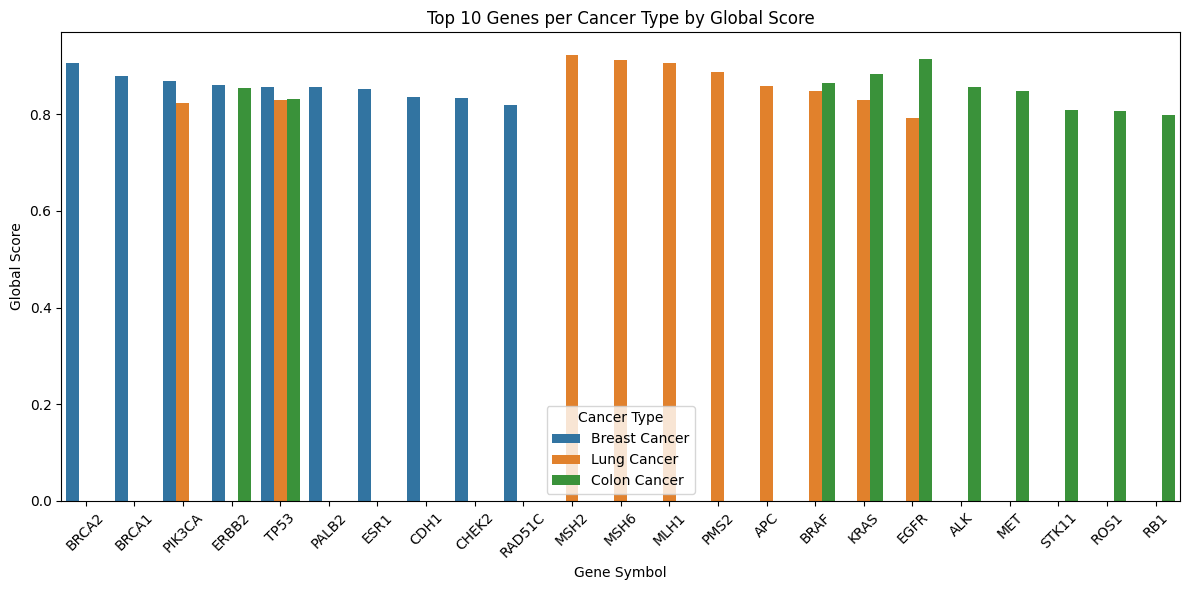

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# افزودن برچسب بیماری به هر دیتافریم
df1['CancerType'] = 'Breast Cancer'
df2['CancerType'] = 'Lung Cancer'
df3['CancerType'] = 'Colon Cancer'

# انتخاب فقط ژن‌ها با globalScore بالا و ستون‌های مورد نیاز
top1 = df1[['symbol', 'globalScore', 'CancerType']].sort_values(by='globalScore', ascending=False).head(10)
top2 = df2[['symbol', 'globalScore', 'CancerType']].sort_values(by='globalScore', ascending=False).head(10)
top3 = df3[['symbol', 'globalScore', 'CancerType']].sort_values(by='globalScore', ascending=False).head(10)

# ادغام داده‌ها
top_all = pd.concat([top1, top2, top3])

# رسم نمودار
plt.figure(figsize=(12,6))
sns.barplot(data=top_all, x='symbol', y='globalScore', hue='CancerType')
plt.title('Top 10 Genes per Cancer Type by Global Score')
plt.xlabel('Gene Symbol')
plt.ylabel('Global Score')
plt.xticks(rotation=45)
plt.legend(title='Cancer Type')
plt.tight_layout()
plt.show()


In [4]:
# پیدا کردن ژن‌های مشترک بین سه دیتافریم
genes_1 = set(df1['symbol'])
genes_2 = set(df2['symbol'])
genes_3 = set(df3['symbol'])

# پیدا کردن ژن‌های مشترک بین سه سرطان
common_genes = genes_1.intersection(genes_2, genes_3)

print(f"تعداد ژن‌های مشترک بین سه سرطان: {len(common_genes)}")


تعداد ژن‌های مشترک بین سه سرطان: 9044


تعداد ژن‌های مشترک بین سه سرطان از Top 10: 1


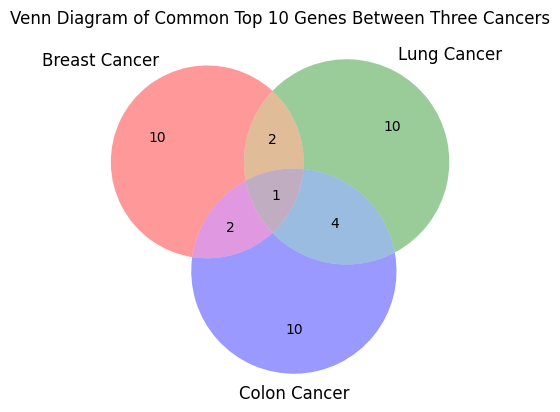

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# بارگذاری فایل‌ها
file1 = '/content/OT-EFO_0000305-associated-targets-5_2_2025-v25_03.tsv'    # سرطان سینه
file2 = '/content/OT-MONDO_0005575-associated-targets-5_2_2025-v25_03.tsv'  # سرطان ریه
file3 = '/content/OT-MONDO_0008903-associated-targets-5_2_2025-v25_03.tsv'  # سرطان روده

df1 = pd.read_csv(file1, sep='\t')
df2 = pd.read_csv(file2, sep='\t')
df3 = pd.read_csv(file3, sep='\t')

# انتخاب 10 ژن برتر برای هر سرطان بر اساس globalScore
top1 = df1[['symbol', 'globalScore']].sort_values(by='globalScore', ascending=False).head(10)
top2 = df2[['symbol', 'globalScore']].sort_values(by='globalScore', ascending=False).head(10)
top3 = df3[['symbol', 'globalScore']].sort_values(by='globalScore', ascending=False).head(10)

# پیدا کردن ژن‌های مشترک بین سه دیتافریم (بر اساس Top 10 ژن‌ها)
genes_1_top10 = set(top1['symbol'])
genes_2_top10 = set(top2['symbol'])
genes_3_top10 = set(top3['symbol'])

# پیدا کردن ژن‌های مشترک بین سه سرطان برای Top 10
common_genes_top10 = genes_1_top10.intersection(genes_2_top10, genes_3_top10)

# تعداد ژن‌های مشترک از Top 10
print(f"تعداد ژن‌های مشترک بین سه سرطان از Top 10: {len(common_genes_top10)}")

# رسم Venn Diagram برای سه سرطان با Top 10 ژن
venn3(subsets=(len(genes_1_top10), len(genes_2_top10), len(genes_1_top10 & genes_2_top10), len(genes_3_top10), len(genes_1_top10 & genes_3_top10), len(genes_2_top10 & genes_3_top10), len(common_genes_top10)),
      set_labels=('Breast Cancer', 'Lung Cancer', 'Colon Cancer'))

plt.title('Venn Diagram of Common Top 10 Genes Between Three Cancers')
plt.show()


In [1]:
# فرض کنید این سه مجموعه ژن مربوط به سرطان‌ها هستند
genes_breast = {'BRCA1', 'TP53', 'HER2', 'BRCA2', 'PIK3CA'}
genes_lung = {'TP53', 'EGFR', 'KRAS', 'BRAF', 'PIK3CA'}
genes_colorectal = {'TP53', 'KRAS', 'BRAF', 'APC', 'PIK3CA'}

# استخراج ژن‌های مشترک بین سه سرطان
common_genes = genes_breast.intersection(genes_lung).intersection(genes_colorectal)

# نمایش ژن‌های مشترک
print("Genes common to all cancers:", common_genes)


Genes common to all cancers: {'TP53', 'PIK3CA'}


In [8]:
import pandas as pd

# بارگذاری فایل TSV با استفاده از read_csv و تعیین جداکننده تب
df_tp53 = pd.read_csv('/content/differentialResults.tsv', delimiter='\t')  # فایل TP53
df_pik3ca = pd.read_csv('/content/differentialResults (1).tsv', delimiter='\t')  # فایل PIK3CA


In [9]:
# مشاهده داده‌ها برای ژن TP53
df_tp53.head()

# مشاهده داده‌ها برای ژن PIK3CA
df_pik3ca.head()


,Gene,Species,Experiment accession,Comparison,log_2 fold change,Adjusted p-value,t-statistic
0,ENSG00000129824,homo sapiens,E-GEOD-68086,'breast carcinoma' vs 'normal',-8.9,2.479496e-30,NaN
1,ENSG00000183878,homo sapiens,E-GEOD-68086,'breast carcinoma' vs 'normal',-7.6,1.515649e-23,NaN
2,ENSG00000131002,homo sapiens,E-GEOD-68086,'breast carcinoma' vs 'normal',-7.6,2.088060e-19,NaN
3,ENSG00000198692,homo sapiens,E-GEOD-68086,'breast carcinoma' vs 'normal',-7.5,6.671350e-44,NaN
4,ENSG00000154620,homo sapiens,E-GEOD-68086,'breast carcinoma' vs 'normal',-7.5,9.670489e-32,NaN


In [11]:
df_tp53.columns


Index(['Gene', 'Species', 'Experiment accession', 'Comparison',
       'log_2 fold change', 'Adjusted p-value', 't-statistic'],
      dtype='object')

In [12]:
# تحلیل تغییرات بیان برای ژن TP53
df_tp53_sorted = df_tp53[['Gene', 'log_2 fold change']].sort_values(by='log_2 fold change', ascending=False)
top_genes_tp53 = df_tp53_sorted.head(10)

# نمایش 10 ژن برتر
print("Top 10 genes for TP53:")
print(top_genes_tp53)


Top 10 genes for TP53:
              Gene  log_2 fold change
0  ENSG00000162892                5.0
5  ENSG00000138772                4.1
6  ENSG00000006128                4.0
4  ENSG00000113532               -4.1
3  ENSG00000123560               -4.2
2  ENSG00000115461               -4.6
1  ENSG00000111341               -4.8


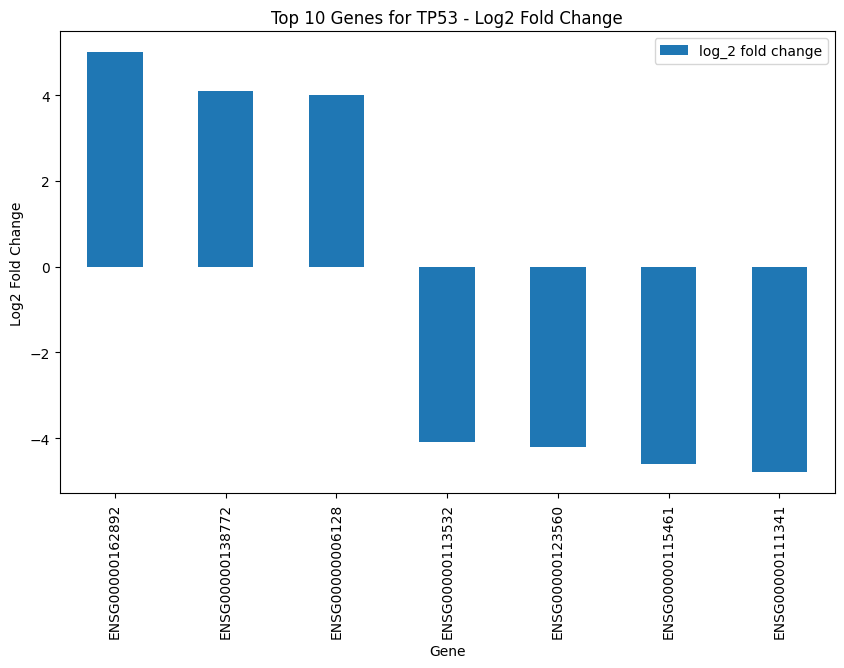

In [13]:
import matplotlib.pyplot as plt

# ترسیم نمودار برای ژن TP53
df_tp53_sorted[['Gene', 'log_2 fold change']].head(10).plot(kind='bar', x='Gene', y='log_2 fold change', figsize=(10, 6))
plt.title("Top 10 Genes for TP53 - Log2 Fold Change")
plt.xlabel("Gene")
plt.ylabel("Log2 Fold Change")
plt.show()


In [14]:
# تحلیل تغییرات بیان برای ژن PIK3CA
df_pik3ca_sorted = df_pik3ca[['Gene', 'log_2 fold change']].sort_values(by='log_2 fold change', ascending=False)
top_genes_pik3ca = df_pik3ca_sorted.head(10)

# نمایش 10 ژن برتر
print("Top 10 genes for PIK3CA:")
print(top_genes_pik3ca)


Top 10 genes for PIK3CA:
                Gene  log_2 fold change
375  ENSG00000131188                5.6
964  ENSG00000241170               -5.2
963  ENSG00000256553               -5.2
962  ENSG00000248975               -5.2
961  ENSG00000279530               -5.2
960  ENSG00000254843               -5.2
959  ENSG00000251629               -5.2
958  ENSG00000146276               -5.2
965  ENSG00000230872               -5.2
956  ENSG00000146006               -5.2


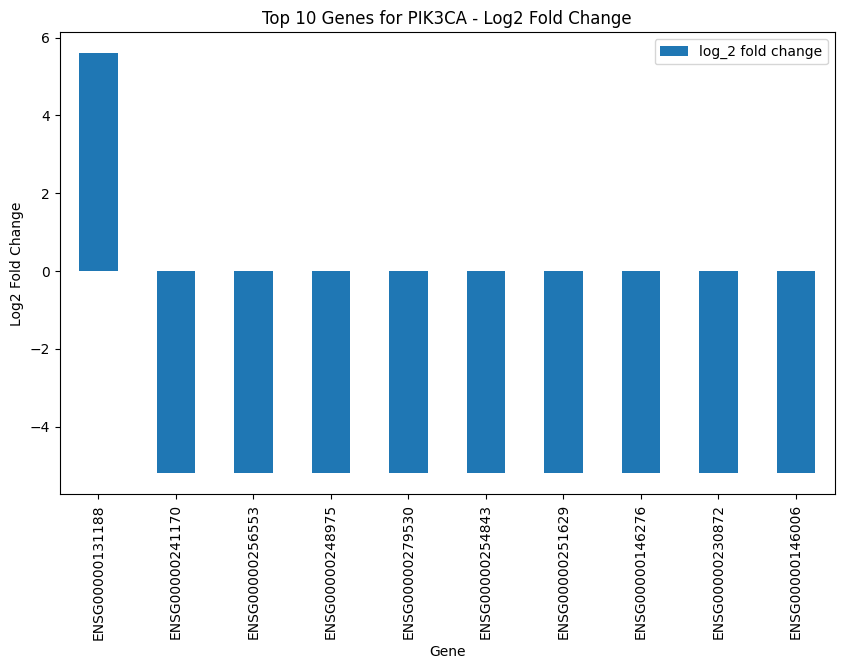

In [15]:
# ترسیم نمودار برای ژن PIK3CA
df_pik3ca_sorted[['Gene', 'log_2 fold change']].head(10).plot(kind='bar', x='Gene', y='log_2 fold change', figsize=(10, 6))
plt.title("Top 10 Genes for PIK3CA - Log2 Fold Change")
plt.xlabel("Gene")
plt.ylabel("Log2 Fold Change")
plt.show()


In [19]:
# ذخیره DataFrame به فایل CSV یا TSV
df_tp53_sorted.to_csv('/content/tp53_results.csv', index=False)  # ذخیره به فرمت CSV
df_pik3ca_sorted.to_csv('/content/pik3ca_results.csv', index=False)  # ذخیره به فرمت CSV

# دانلود فایل‌ها
from google.colab import files
files.download('/content/tp53_results.csv')
files.download('/content/pik3ca_results.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>